## Hur bra är klustringen?

Den här anteckningsboken baseras också på Livsmedelsverkets Livsmedelsdatabas. Verkets klassificering i huvudgrupper kontrasteras mot klustring av livsmedel baserat på näringsvärde.


In [2]:
import sqlite3
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
debug = True

Börja med att läsa in allt från databasen. 

Allt ligger i variabeln dataset som är en numpy-array. Kolumn 0 är livsmedelsnamnet, 1 är livsmedelsnumret.

In [4]:
conn = sqlite3.connect('livs.db')
conn.row_factory = sqlite3.Row
curs = conn.cursor()

result = []
for row in curs.execute('select * from livs'):
    result.append(row)

conn.close()

dataset = np.array(result)
if debug:
    print (dataset[:5,:5])

[['Talg nöt' '1' 656.3 2746.0 0.0]
 ['Späck gris' '2' 763.0 3192.6 0.0]
 ['Ister gris' '3' 884.3 3700.0 0.0]
 ['Kokosfett' '4' 884.3 3700.0 0.0]
 ['Matfettsblandning havssaltat fett 80% berikad typ Bregott' '5' 711.5
  2977.0 0.5]]


Låt oss gå direkt på klustringen.

Det finns över 50 näringsvärden i databasen. De här tror jag ger en bra bild av rymden av livsmedel. 
```
[2 'Energi_kcal' 'REAL' 0 None 0]
[4 'Kolhydrater_g' 'REAL' 0 None 0]
[5 'Fett_g' 'REAL' 0 None 0]
[6 'Protein_g' 'REAL' 0 None 0]
[7 'Fibrer_g' 'REAL' 0 None 0]
[8 'Vatten_g' 'REAL' 0 None 0]
[9 'Alkohol_g' 'REAL' 0 None 0]
[10 'Aska_g' 'REAL' 0 None 0]
[42 'Vitamin_C_mg' 'REAL' 0 None 0]
[50 'Jarn_mg' 'REAL' 0 None 0]
```

Men kanske behövs inte alla dessa för att få en bra klassificering.

In [5]:
#Här är det urval som används nu
relevant_columns = [2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57]

#Kandidater [ 2,  4,  5,  6,  7,  8,  9, 10, 42, 50]

#Här är alla möjliga dimensioner. En del försvinner eftersom de 
#har värden som saknas för vissa livsmedel
#[ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57]

Det går förstås att välja en massa olika klustringsalgoritmer. Vi har valt k-means. Det finns också en hel del parametrar att välja. <http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [6]:
columns = dataset[:,relevant_columns] #Tar man bort ':,' blir det alltså ett urval rader
print(columns)

[[656.3 0.0 71.0 ... 0.03 1.0 '0.1']
 [763.0 0.0 85.0 ... 0.03 5.0 '0.4']
 [884.3 0.0 100.0 ... 0.01 7.0 '0.1']
 ...
 [40.6 7.6 0.5 ... 0.1 0.0 '0.05']
 [372.6 72.6 3.55 ... 20.25 3.5 '1.05']
 [313.7 57.5 4.8 ... 1.8 2.0 '0.6']]


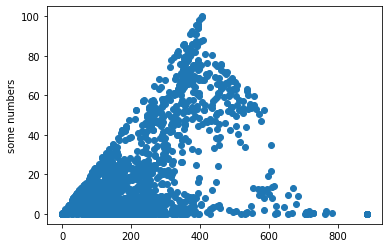

In [7]:
plt.scatter(columns[:,0],columns[:,1])
plt.ylabel('some numbers')
plt.show()

In [8]:
 def cluster(dataset):
    kmeans = KMeans(n_clusters=numClusters, verbose=0, n_init=100)
    kmeans.fit(dataset)

    centroids = kmeans.cluster_centers_
    clusters = kmeans.labels_
    
    #Utskriften kommer ju inte här, utan efter funktionsanropet
    if debug:
        print (centroids)
        print (clusters)

    return clusters, centroids

In [9]:
#Livsmedelsdatabasen innehåller över 100 huvudgrupper. Det hade varit bra att ha något 
#färre grupper på översta nivån. Högst 50. Eller kanske bara 10, för att komma ner i något som
#skulle kunna motsvara "frukt, grönsaker, fisk, kött, nötter" etc.
numClusters = 30

In [10]:
clusters, centroids = cluster(columns)

[[ 8.03719008e+01  1.16736157e+01  1.94500000e+00 ...  9.48966942e-02
   1.28450413e+00  4.39380165e-01]
 [ 2.25200000e+02  1.78180000e+01  8.71600000e+00 ...  4.85040000e+01
   0.00000000e+00  0.00000000e+00]
 [ 1.29400000e+02  1.80000000e+00  3.70000000e+00 ...  1.90000000e-01
   5.00000000e+01  3.40000000e+00]
 ...
 [ 2.53578519e+02  2.35392593e+01  1.21418148e+01 ...  1.32151852e+00
   8.69270370e+00  1.35688889e+00]
 [ 1.59100000e+02  2.12033333e+01  4.43666667e+00 ...  4.07533333e+01
  -8.88178420e-16  0.00000000e+00]
 [ 3.59900000e+02  4.81000000e+01  1.60000000e+00 ...  1.30000000e-01
   3.30000000e+00  1.35000000e+01]]
[22 22 22 ...  0  5  8]


Clusters är en array som är lika lång som antalet rader i dataset:

In [11]:
print(clusters, "Antal värden:", len(clusters))

[22 22 22 ...  0  5  8] Antal värden: 2088


Beroende på hur man väljer parametrarna vid klustringen kan man få liten eller stor variation i hur många som hamnar i de olika klustren.

Här är en tabell med fördelningen, och med några enkla statistiska mått.

In [12]:
unique, counts = np.unique(clusters, return_counts=True) #https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
cluster_distribution = np.array(list(zip(unique, counts)))
print(cluster_distribution)
print("Medelvärde:", np.mean(cluster_distribution.T[1]))
print("Median:", np.median(cluster_distribution.T[1]))
print("Standardavvikelse:",np.std(cluster_distribution.T[1]))

[[  0 484]
 [  1   5]
 [  2   1]
 [  3   4]
 [  4   2]
 [  5   5]
 [  6   8]
 [  7  54]
 [  8 163]
 [  9   1]
 [ 10   1]
 [ 11   1]
 [ 12   3]
 [ 13   1]
 [ 14  11]
 [ 15 361]
 [ 16   1]
 [ 17  54]
 [ 18 343]
 [ 19   1]
 [ 20   2]
 [ 21  12]
 [ 22 225]
 [ 23  32]
 [ 24   3]
 [ 25   4]
 [ 26  32]
 [ 27 270]
 [ 28   3]
 [ 29   1]]
Medelvärde: 69.6
Median: 4.5
Standardavvikelse: 128.49503232939915


Ett första mått skulle kunna vara hur hur blandade ens kluster är, alltså hur många huvudgrupper de innehåller livsmedel från.

In [13]:
valt_kluster = 0

Eftersom det är så många livsmedel i varje kluster är det lättare att visa dem som en fördelning:

In [14]:
a=dataset[np.where(clusters==valt_kluster)][:,[0,60]]
unique, counts = np.unique(a.T[1], return_counts=True) #https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
huvudgrupp_distribution = np.array(list(zip(unique, counts)))

order=np.argsort(huvudgrupp_distribution.T[1].astype(int))
order = np.flipud(order)
#print (order)
huvudgrupp_distribution = huvudgrupp_distribution[order]
print(huvudgrupp_distribution, "\n", len(huvudgrupp_distribution))

[['Grönsaker' '50']
 ['Frukt färsk fryst' '38']
 ['Bär färska frysta' '23']
 ['Fruktjuice mm' '21']
 ['Söta soppor kräm o efterrättssås' '20']
 ['Saft läsk cider u alkohol' '18']
 ['Sylt marmelad gelé äppelmos o dyl' '18']
 ['Glass' '17']
 ['Frukt o bär konserverade' '17']
 ['Vatten mineralvatten' '15']
 ['Efterrätter' '14']
 ['Grädde creme fraiche' '13']
 ['Baljväxter (bönor, linser och ärter)' '13']
 ['Vegetabiliska produkter och mjölkersättning' '12']
 ['Pasta' '12']
 ['Naturell fil yoghurt' '11']
 ['Smaksatt fil yoghurt' '11']
 ['Vin' '10']
 ['Rotfrukter' '9']
 ['Gröt' '9']
 ['Mjölk' '8']
 ['Grönsaks- rotfrukts- baljväxträtter och produkter' '7']
 ['Ris risnudlar' '7']
 ['Starksprit' '7']
 ['Färskost o kvarg' '5']
 ['Kost- o näringspreparat' '5']
 ['Mjölkdryck chokladdryck milkshake smothie m yoghurt' '5']
 ['Grönsaksblandningar med rotfrukter och eller baljväxter' '5']
 ['Bullar kakor tårtor mm' '5']
 ['Välling' '5']
 ['Matgryn' '4']
 ['Öl' '4']
 ['Lightdrycker u energi' '4']
 ['S

cluster_distribution innehåller alla klustren och antal livsmedel. Vi vill göra om det så att vi får alla klustren och antal huvudgrupper i stället.

In [194]:
print (cluster_distribution[:,0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [195]:
cluster_profile = np.array([])
for row in cluster_distribution[:,0]:
    a=dataset[np.where(clusters==row)][:,[0,60]]
    unique, counts = np.unique(a.T[1], return_counts=True) #https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
    huvudgrupp_distribution = np.array(list(zip(unique, counts)))

    order=np.argsort(huvudgrupp_distribution.T[1].astype(int))
    order = np.flipud(order)
    #print (order)
    huvudgrupp_distribution = huvudgrupp_distribution[order]
    cluster_profile=np.append(cluster_profile,len(huvudgrupp_distribution))
    #print(len(huvudgrupp_distribution))

print(cluster_profile, np.mean(cluster_profile))
    

[ 34.   1.   1.   2.   1.  56.   1.   2.   4.   1.   1.   1.   1.   2.   6.
  35.  14.  34.   1.   2.  68.   9.   2.   1.   6.   1.  12.   2.   9.  25.] 11.1666666667


Klusterprofilen cluster_profile blir hur många huvudgrupper vi får i varje kluster, och så för alla kluster. 

När man klustrar med många näringsvärden verkar det bli mer spridning på antalet huvudgrupper i klustren, vilket kanske inte är det man vill ha...